In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [10]:
import os
os.getcwd()
os.chdir('c:\\Users\\Stior\\Documents\\cours\\L3SID\\Projet-InterPromo\
\\ProjetInterpromo2020G8')

In [2]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import PIL

In [3]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    

class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [4]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [14]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


### Ouverture d'image

In [15]:
img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A330-200_plane4.jpg', 0)
img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A330-200_plane4.jpg', 1)

# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/\
#                         Aer_Lingus_Airbus_A320_plane9.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/\
#                         Aer_Lingus_Airbus_A320_plane9.jpg', 1)


# # img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/\
#                         Air_Transat_Airbus_A330-300_V2_plane128.jpg', 0)
# # img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/\
#                         Air_Transat_Airbus_A330-300_V2_plane128.jpg', 1)

# template = cv2.imread('./images/temp_normal_seat.jpg', 0)
# template = cv2.imread('./images/templateTest.jpg', 0)
# template = cv2.imread('./images/templateNormalSeat-SansBlanc.png', 0)
# template = cv2.imread('./images/templateNormalSeat-SansBlanc.jpg', 0)
template = cv2.imread('./images/templateTest-sansBlanc.png', 0)

# cv2.imshow('Test', img2)
# cv2.waitKey()
# cv2.destroyAllWindows()
h, w = template.shape
# Match template method
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',\
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

### Premier test de pattern matching + sortie en txt

In [16]:

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
THRESHOLD = 0.8
loc = np.where( res >= THRESHOLD)

coord = []

for pt in zip(*loc[::-1]):
    coord.append((pt[0], pt[1]))
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

for i in coord:
    cv2.circle(img_rgb, i, 1, (255, 0, 0), -1)

cv2.imshow('test', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows() 

print(coord)


with open("coord.txt", "a") as fichier:
    for xy in coord:
        fichier.write(str(xy[0]) + ", " + str(xy[1]) + "\n")



[(146, 517), (133, 537), (146, 537), (185, 537), (198, 537), (211, 537), (224, 537), (263, 537), (276, 537), (133, 557), (146, 557), (185, 557), (198, 557), (211, 557), (224, 557), (263, 557), (276, 557), (133, 577), (146, 577), (185, 577), (198, 577), (211, 577), (224, 577), (263, 577), (276, 577), (133, 597), (146, 597), (185, 597), (198, 597), (211, 597), (224, 597), (263, 597), (276, 597), (133, 617), (146, 617), (185, 617), (198, 617), (211, 617), (224, 617), (263, 617), (276, 617), (133, 637), (146, 637), (185, 637), (198, 637), (211, 637), (224, 637), (263, 637), (276, 637), (133, 657), (146, 657), (185, 657), (198, 657), (211, 657), (224, 657), (263, 657), (276, 657), (133, 677), (146, 677), (185, 677), (198, 677), (211, 677), (224, 677), (263, 677), (276, 677), (133, 697), (146, 697), (185, 697), (198, 697), (211, 697), (224, 697), (263, 697), (276, 697), (133, 717), (146, 717), (185, 717), (198, 717), (211, 717), (224, 717), (263, 717), (276, 717), (133, 737), (146, 737), (18

### Second test avec list de pattern

In [17]:
img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A330-200_plane4.jpg', 0)
img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A330-200_plane4.jpg', 1)
# template = cv2.imread('./images/temp_normal_seat.jpg', 0)
templates = ['./images/temp_business_seat_armrest_left.jpg', './images/temp_business_seat_armrest_right.jpg', './images/temp_business_elec1.jpg']
# templates = ['./images/templateBusinessElectricity.jpg']

for templ in templates:
    template = cv2.imread(templ, 0)
    h, w = template.shape
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    if templ == './images/temp_business_elec1.jpg':
        THRESHOLD = 0.7
    else:
        THRESHOLD = 0.7

    loc = np.where(res >= THRESHOLD)

    coord = []

    fichier = open("coord.txt", "a")

    if templ == './images/temp_business_elec1.jpg':
        fichier.write('-------------------\nPrise electrique \n')

    for pt in zip(*loc[::-1]):
        fichier.write(str(pt[0]) + ", " + str(pt[1]) + "\n")
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
    fichier.close()

cv2.imshow('test', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()
# cv2.imwrite('test.jpeg', img_rgb)

print(np.where(res >= THRESHOLD))

(array([334, 334, 334, 334, 334, 367, 367, 368, 399, 401, 431, 431, 435,
       435, 435], dtype=int64), array([140, 190, 217, 268, 269, 191, 218, 250, 190, 140, 191, 218, 149,
       250, 277], dtype=int64))


In [18]:
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A350-900_plane259.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A350-900_plane259.jpg', 1) # Ok
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A350-1000_plane258.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A350-1000_plane258.jpg', 1) # Ok
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A330_33E_plane255.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Cathay_Pacific_Airbus_A330_33E_plane255.jpg', 1) # Ok
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/American_Airlines_777-300_ER_plane167.svg.png', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/American_Airlines_777-300_ER_plane167.svg.png', 1) # Null
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Asiana_Boeing_777-200_ER_D_plane206.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Asiana_Boeing_777-200_ER_D_plane206.jpg', 1) # Null - rectangle autour
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Avianca_Boeing_787-8_plane313.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/Avianca_Boeing_787-8_plane313.jpg', 1) #Ok
img_gray = cv2.imread('./theo_remove_caracters_yellow.jpg', 0)
img_rgb = cv2.imread('./theo_remove_caracters_yellow.jpg', 1) #Ok


# template = cv2.imread('./images/temp_normal_seat.jpg', 0)
templates = ['./images/temp_business_turn_left.jpg', 'templateTest.jpg', './images/templateNormalSeat-SansBlanc.jpg', './images/temp_normal_seat_elec.jpg']




#### Rotation d'un template + changement du noir en blanc

In [19]:
# Rotation 45° left + black => white

templateTest = PIL.Image.open('./images/temp_business_seat_footrest.jpg')
rotate = templateTest.rotate(45)
rotate = rotate.convert('RGBA')

data = np.array(rotate)   # "data" is a height x width x 4 numpy array
red, green, blue, alpha = data.T # Temporarily unpack the bands for readability


black_areas = (red == 0) & (blue == 0) & (green == 0)
data[..., :-1][black_areas.T] = (255, 255, 255) # Black back to white
rotate = PIL.Image.fromarray(data)
rotate.show()
rotate = rotate.convert('RGB')
rotate.save('templateTest.jpg')

#### Transformation d'un template en son symétrique par rapport a la droite

In [20]:
# Right symmetry
templateTest = PIL.Image.open('./images/temp_business_turn_left.jpg')
rotate = templateTest.transpose(PIL.Image.FLIP_LEFT_RIGHT)

rotate.show()
rotate.save('templateTest.jpg')


#107-171-93

#### Changement du fond blanc => couleur voulu

In [21]:
templateTest = PIL.Image.open(templates[2])
templateTest = templateTest.convert('RGBA')

data = np.array(templateTest)
red, green, blue, alpha = data.T

THRESHOLD = 250 # To chose white background

white_areas = (red >= THRESHOLD) & (blue >= THRESHOLD) & (green >= THRESHOLD)
data[..., :-1][white_areas.T] = (255, 0, 0) # Set background color
templateTest = PIL.Image.fromarray(data)
templateTest.show()

#### Test avec les pattern précédement modifié + sortie des coordonnées pour chaque siege

In [22]:
for templ in templates:
    template = cv2.imread(templ, 0)
    h, w = template.shape
    
    res = cv2.matchTemplate(img_gray, template,cv2.TM_CCOEFF_NORMED)
    
    THRESHOLD = 0.9
    if templ == 'templateTest.jpg':
        THRESHOLD = 0.60
    if templ == templates[0]:
        THRESHOLD = 0.60
    if templ == templates[3]:
        THRESHOLD = 0.7


    loc = np.where( res >= THRESHOLD)

    # fichier = open("coord.txt", "a")
    for pt in zip(*loc[::-1]):
        # fichier.write(str(pt[0]) + ", " + str(pt[1]) + "\n")
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# fichier.close()

cv2.imshow('test', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('test.jpg', img_rgb)

#print(np.where( res >= THRESHOLD))

AttributeError: 'NoneType' object has no attribute 'shape'

### Mise au propre + commmentaire + test sur plusieur image similaire

In [0]:
# Input Image plane
# Ok
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A350-900_plane259.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A350-900_plane259.jpg', 1)
# OK
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A350-1000_plane258.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A350-1000_plane258.jpg', 1)
# Ok
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A330_33E_plane255.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Cathay_Pacific_Airbus_A330_33E_plane255.jpg', 1)
# NOk
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'American_Airlines_777-300_ER_plane167.svg.png', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'American_Airlines_777-300_ER_plane167.svg.png', 1)
# NOk
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Asiana_Boeing_777-200_ER_D_plane206.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Asiana_Boeing_777-200_ER_D_plane206.jpg', 1)
# OK
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/'\
# 'Avianca_Boeing_787-8_plane313.jpg', 0)
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/' \
# 'LAYOUT SEATGURU/Avianca_Boeing_787-8_plane313.jpg', 1)
# Ok
img_gray = cv2.imread('./theo_remove_caracters_yellow.jpg', 0)
img_rgb = cv2.imread('./theo_remove_caracters_yellow.jpg', 1)

# Input template
templates = [
            './images/temp_business_turn_left.jpg',
            './images/temp_business_turn_right.jpg',
            './images/temp_normal_seat_elec.jpg'
            ]

for templ in templates:
    # Open template
    template = cv2.imread(templ, 0)
    h, w = template.shape

    # List of match
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

    # Set accuracy for each template
    threshold = 0.9
    if templ == templates[0]:
        print('temp_business_turn_left')
        threshold = 0.60
    if templ == templates[1]:
        print('temp_business_turn_right')
        threshold = 0.60
    if templ == templates[2]:
        print('temp_normal_seat_elec')
        threshold = 0.63

    loc = np.where(res >= threshold)  # Filtering with the previous THRESHOLD

    for pt in zip(*loc[::-1]):
        # Output seat position
        print(str(pt[0]) + ', ' + str(pt[1]))
        # Tracing rectangle
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

# Display results
# cv2.imshow('test', img_rgb)
# cv2.waitKey()
# cv2.destroyAllWindows()

# Save results
# cv2.imwrite('test.jpg', img_rgb)

### Creation d'une fonction du code précédent : 
#### Entrée : chemin d'image, liste de chemin de templates, liste de seuils
#### Sortie : Liste de liste de coordonnée pour chaque template

In [0]:
def coord_seats_finder(path_image, templates = ['./images/temp_business_turn_left.jpg', './images/temp_business_turn_right.jpg', './images/temp_normal_seat_elec.jpg'], thresholds = [0.60, 0.60, 0.63], show = False):
    """
    input:
        path_image : image plane
        templates : list of templates for pattern matching
        thresholds : list of threshold for each template, set accuracy
    output:
        position : list of list right angle position for each pattern match
    """
    # Open image
    img_rgb = cv2.imread(path_image, 1)
    img_gray = cv2.imread(path_image, 0)
    position = []
    for i in range(len(templates)):  # Iteration on each pattern
        template = cv2.imread(templates[i], 0)  # Read pattern image
        h, w = template.shape
        # List of match
        res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
        position.append([])
        for pos in zip(*np.where(res >= thresholds[i])[::-1]):
            position[i].append(pos)  # add position to output
            cv2.rectangle(img_rgb, pos, (pos[0] + w, pos[1] + h), (0, 0, 255), 2)
    if show:
        cv2.imshow('test', img_rgb)
        cv2.waitKey()
        cv2.destroyAllWindows()
    return(position)

print(coord_seats_finder('./theo_remove_caracters_yellow.jpg', show = False))


### Simplification de la fonction coord_seats_finder() :
#### Entrée : une image, un template, un seuil
#### Sortie : list de coordonnée

In [0]:
def coord_pattern_finder(image, template, threshold: float):
    """
    input:
        image : image plane cv2.imread() black and white
        template : image pattern cv2.imread() black and white
        threshold : threshold for this pattern
    output:
        position : list right angle position for this pattern on the image

    """
    position = []  # Variable output
    # List of match
    res = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    for pos in zip(*np.where(res >= threshold)[::-1]):
        position.append(pos)
    return(position)

### Test de la fonction coord_pattern_finder()

In [0]:
path_image = './theo_remove_caracters_yellow.jpg'
templates = ['./images/temp_business_turn_left.jpg', './images/temp_business_turn_right.jpg', './images/temp_normal_seat_elec.jpg']
thresholds = [0.60, 0.60, 0.63]
img = cv2.imread(path_image, 0)
template = cv2.imread(templates[0], 0)
h, w = template.shape
img_rgb = cv2.imread(path_image, 1)

position = coord_pattern_finder(img, template, 0.6)

for pos in position:
    cv2.rectangle(img_rgb, pos, (pos[0] + w, pos[1] + h), (0, 0, 255), 2)

cv2.imshow('test', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()

### Test sur plusieur plan ou famille de plan avec choix d'un ou plusieur pattern

In [0]:
pathTempl = "./Images/" # Path for template
imagesTemp = os.listdir(pathTempl)
templates = []
tempName = 'temp_' # Template or family name

pathPlane = "../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/" # Path for plane images
imagesPlane = os.listdir(pathPlane)
plane = []

planeName = 'Aer_Lingus_' # Plane or family name


for i in imagesTemp:
    if 'temp_' in i and 'seat' in i:
        templates.append(i)

for i in imagesPlane:
    if planeName in i:
        plane.append(i)

# print(templates)

for p in plane[:3]:
    img_rgb = cv2.imread(pathPlane + p, 1)
    img_gray = cv2.imread(pathPlane + p, 0)
    # print(p + ' shape', img_gray.shape)

    fichier = open("coord_" + p + ".txt", "a")
    
    for templ in templates[5:6]:
        template = cv2.imread(pathTempl + templ, 0)
        h, w = template.shape
        print(templ + ':' + str(w) + ' ' + str(h))

        threshold = 0.8 #  Default threshold
        # Choose threshold for each template
        if templ == 'temp_business_seat_armrest_left.jpg':
            threshold = 0.6
        elif templ == 'temp_business_seat_armrest_right.jpg':
            threshold = 0.6
        elif templ == 'temp_business_seat_footrest.jpg':
            threshold = 1
        elif templ == 'temp_first_seat.jpg':
            threshold = 1
        elif templ == 'temp_normal_seat.png':
            threshold = 0.7
        elif templ == 'temp_normal_seat_elec.jpg':
            threshold = 1
        elif templ == 'temp_normal_seat_little.jpg':
            threshold = 0.65
        elif templ == 'temp_yellow_seat.jpg':
            threshold = 1
        threshold = 0.75


        position = coord_pattern_finder(img_gray, template, threshold)
        
        fichier.write(templ + ':' + str(w) + ' ' + str(h) + '\n')
        for pos in position:
            fichier.write(str(pos[0]) + ', ' + str(pos[1]) + '\n')
            cv2.rectangle(img_rgb, pos, (pos[0] + w, pos[1] + h), (0, 0, 255), 2)

    fichier.close()
    cv2.imshow(p, img_rgb)
    cv2.waitKey()
    cv2.destroyAllWindows()

### Recupération nombre de seat par type d'avion et par catégorie

In [0]:
pathPlane = "../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/" # Path for plane images
imagesPlane = os.listdir(pathPlane)
plane = []
planeName = 'Aer_Lingus_' # Plane or family name

for i in imagesPlane:
    if planeName in i:
        plane.append(i)

SEATGURU_INFO_AIRCRAFT = pd.read_csv('../All data/SEATGURU_INFO_AIRCRAFT.csv', sep=';')
image_lignes = pd.read_csv('Image_lignes.csv', sep=';')

nbSeatTotal = {}

for rowNumber, data in image_lignes.iterrows():
    if data['image'] in plane:
        lignes = eval(data['lignes'])
        for i in lignes:
            if not (data['image'] in nbSeatTotal.keys()):
                nbSeatTotal[data['image']] = {}
                nbSeatTotal[data['image']]['Total_seat'] = SEATGURU_INFO_AIRCRAFT.loc[i]['Total_seat']
            if not (SEATGURU_INFO_AIRCRAFT.loc[i]['Category'] in nbSeatTotal[data['image']].keys()):
                nbSeatTotal[data['image']][SEATGURU_INFO_AIRCRAFT.loc[i]['Category']] = SEATGURU_INFO_AIRCRAFT.loc[i]['Count']

print(nbSeatTotal)

### Creation category template

In [0]:
def templ_category(path = './images/', category = 'BUSINESS', ):
    """
    Input:
        Path: directory path of templates
        category: name of category
    Output:
        templates: list of template name
    """
    imagesTemp = os.listdir(path)
    templates = []

    for i in imagesTemp:
        if 'temp_' + category in i:
            templates.append(i)
    
    return(templates)

print(templ_category(category = 'normal'))

### calcul taux réussite

In [0]:
pathPlane = "../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/" # Path for plane images

cat = 'ECONOMY'
templates = templ_category(category = 'normal')
print(templates)

if cat == 'ECONOMY':
    threshold = 0.8
elif cat == 'BUSINESS':
    threshold = 0.65

for p in plane:
    img_rgb = cv2.imread(pathPlane + p, 1)
    img_gray = cv2.imread(pathPlane + p, 0)

    # fichier = open("coord_" + p + ".txt", "a")
    taux = []
    for templ in templates:
        template = cv2.imread(pathTempl + templ, 0)

        position = coord_pattern_finder(img_gray, template, threshold)
        if cat in nbSeatTotal[p].keys():
            taux.append(len(position)/nbSeatTotal[p][cat])  # level of succes for each template
    
    print(taux)
    print(p + ': ',nbSeatTotal[p])



### Decoupe template a partir d'un match pour rematch

In [0]:
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aer_Lingus_Airbus_A321_plane10.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Aer_Lingus_Airbus_A321_plane10.jpg' , 0)
img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Boeing_777-200_ER_C_plane205.jpg' , 1)
img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Boeing_777-200_ER_C_plane205.jpg' , 0)

# template = cv2.imread('./images/temp_normal_seat.jpg', 0)
template = cv2.imread('./images/temp_normal_seat_little.jpg', 0)
# template = cv2.imread('./images/temp_business_seat_footrest.jpg', 0)

h, w = template.shape
print(w, h)

threshold = 1
position = coord_pattern_finder(img_gray, template, threshold)
compteur = 0

while len(position) < 1 and threshold > 0.5:
    threshold -= 0.005
    position = coord_pattern_finder(img_gray, template, threshold)

print(threshold, compteur, len(position))

templateTest = img_gray[position[0][1]:position[0][1] + h, position[0][0]:position[0][0] + w]

threshold = 1
position1 = coord_pattern_finder(img_gray, templateTest, threshold)
print('début ', len(position1))
compteur = 0
while (len(position1) < 272) and compteur < 1000:
    position1 = coord_pattern_finder(img_gray, templateTest, threshold)
    # print('threshold :', threshold, ' taille :', len(position1))
    threshold -= 0.005
    compteur += 1

print('threshold :', threshold)

for i in position1:
    cv2.rectangle(img_rgb, i, (i[0] + w, i[1] + h), (0, 0, 255), 2)

for i in position:
    cv2.rectangle(img_rgb, i, (i[0] + w, i[1] + h), (0, 255, 0), 2)


# print(position)

# print(str(w) + ' ' + str(h))
cv2.imshow('Test', templateTest)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imshow('name', img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite('test.jpg', img_rgb)


### Mise en fonction du code précédent

In [152]:
def template_from_template(img, template, thresholdMin = 0.70):
    """
    intput:
        img : image plane
        template : template
        thresholdMin : threshold min to keep template or not
    output:
        template, boolean : true if found
    """
    # default Threshold
    threshold = 1
    position = coord_pattern_finder(img, template, threshold)
    h, w = template.shape
    # Reduce Threshold while no template match
    while len(position) < 1 and threshold > thresholdMin:
        threshold -= 0.005
        position = coord_pattern_finder(img, template, threshold)

    if threshold > thresholdMin:
        # cv2.imshow('name', img[position[0][1]:position[0][1] + h, position[0][0]:position[0][0] + w])
        # cv2.waitKey()
        # cv2.destroyAllWindows()
        return((img[position[0][1]:position[0][1] + h, position[0][0]:position[0][0] + w], True))
    return((None, False))

# Fonction test
# cv2.imshow('Test', template_from_template(img_gray, template))
# cv2.waitKey()
# cv2.destroyAllWindows()

In [153]:
def best_position(img, template, nbSeat, steps = 0.005, thresholdMin = 0.65):
    """
    input:
        img : image plane
        template : template find from this image
        nbSeat : for this cat
        steps : steps for threshold
    output:
        position : coord for each match
    """
    threshold = 1
    position = coord_pattern_finder(img, template, threshold)
    while len(position) < nbSeat and threshold > thresholdMin:
        threshold -= steps
        position += coord_pattern_finder(img, template, threshold)
    
    return(position)

# Fonction Test
# img_rgb = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Boeing_777-200_ER_C_plane205.jpg' , 1)
# img_gray = cv2.imread('../All Data/ANALYSE IMAGE/LAYOUT SEATGURU/' + 'Asiana_Boeing_777-200_ER_C_plane205.jpg' , 0)
# template = cv2.imread('./images/temp_normal_seat_little.jpg', 0)
# h, w = template.shape
# position = best_threshold(img_gray, template_from_template(img_gray, template), nbSeat=272)
# for i in position:
#     cv2.rectangle(img_rgb, i, (i[0] + w, i[1] + h), (0, 0, 255), 2)

# cv2.imshow('name', img_rgb)
# cv2.waitKey()
# cv2.destroyAllWindows()
# cv2.imwrite('test.jpg', img_rgb)


In [13]:
# {'class':[(coordX1, coordY1, h, w), (coordX2, coordY2, h, w)]}
def pos_count_(position):
    pos_count = {}
    for pos in position: 
        pos_count[pos] = position.count(pos)
                        
    return {k: v for k, v in sorted(pos_count.items(), key=lambda item: item[1], reverse=True)}
                    
def rematch(img, nbObjectToFind, diction, planeName, path = './images/'):
    """
    
    input:
        img : image plane
        nbObjectToFind : Dictionnary : {'Total_seat': nbSeatTotal, 'business': nbBusinessSeat, 'bar': nbBar}
        diction : diction output
        planeName :
        path : path for template directory
    output:
        diction : dictionnary {'class':[(coordX1, coordY1, h, w), (coordX2, coordY2, h, w)]}
    """

    # thresholdMin = {'normal':0.7}

    for cat in nbObjectToFind.keys():
        diction[planeName][cat] = []
        if cat != 'Total_seat':
            templates = templ_category(category = cat)  # Take all template name for this category
            print(templates)
            for templ in templates:
                template = cv2.imread(path + templ, 0)
                templateFind, find = template_from_template(img, template)
                if find:
                    position = best_position(img, templateFind, nbObjectToFind[cat])
                        
                    pos_count = pos_count_(position)
                    return pos_count
                
                    h, w = template.shape
                    for i in range(len(position)):
                        position[i] = position[i] + (h, w)
                    diction[planeName][cat] += position

In [ ]:
rematch(img, nbObjectToFind, diction, planeName, path = './images/')

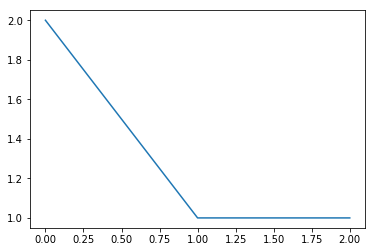

In [12]:
dict_count = {}
liste = [(2,1), (3,4)] + [(2,2), (3,4)]
for el in liste: 
    dict_count[el] = liste.count(el)
{k: v for k, v in sorted(dict_count.items(), key=lambda item: item[1], reverse=True)}